### Import Important Libraries

In [2]:
import mlflow
import numpy as np
import pandas as pd
import seaborn as sns
import mlflow.sklearn
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder , RobustScaler
from sklearn.model_selection import train_test_split , GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report , confusion_matrix , roc_auc_score , roc_curve

### 1. Load the Data
- Load the dataset.
- Display first few rows and general information.
- Drop Loan_ID.
- Show ImBalance in the Data.

In [4]:
df = pd.read_csv(r"G:\Download\archive\train_u6lujuX_CVtuZ9i (1).csv" , encoding = 'UTF8')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.drop('Loan_ID' , axis = 1 , inplace = True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### 2. EDA
- Explore The Data.
- Determine Categorical columns & Numerical columns.
- Show Relationship between Feature.

In [10]:
categorical_cols = df.select_dtypes(include = ['object' , 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include = ['int64' , 'float64']).columns.tolist()

print(f"Categorical columns are : {categorical_cols} \nNumerical columns are : {numerical_cols}")

Categorical columns are : ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'] 
Numerical columns are : ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


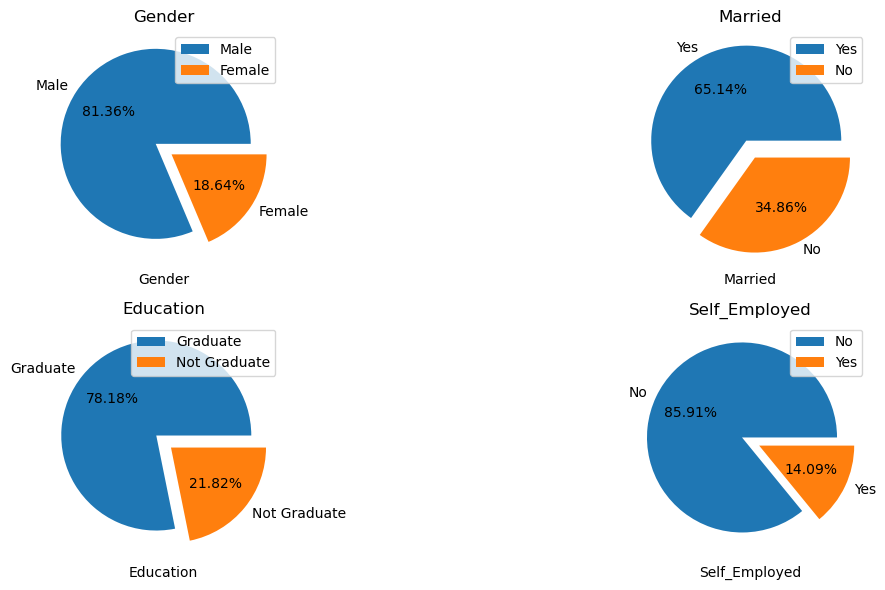

In [11]:
# subplot
plt.figure(figsize=(14,6))
plt.subplot(2,2,1)
plt.pie(x = df['Gender'].value_counts() ,labels = df['Gender'].value_counts().index ,explode = [0.1,0.1] , autopct = '%1.2f%%' )
plt.legend (loc='upper right')
plt.title('Gender')
plt.xlabel('Gender')

plt.subplot(2,2,2)
plt.pie(x = df['Married'].value_counts() ,labels = df['Married'].value_counts().index ,explode = [0.1,0.1] , autopct = '%1.2f%%' )
plt.legend (loc='upper right')
plt.title('Married')
plt.xlabel('Married')

plt.subplot(2,2,3)
plt.pie(x = df['Education'].value_counts() ,labels = df['Education'].value_counts().index ,explode = [0.1,0.1] , autopct = '%1.2f%%' )
plt.legend (loc='upper right')
plt.title('Education')
plt.xlabel('Education')

plt.subplot(2,2,4)
plt.pie(x = df['Self_Employed'].value_counts() ,labels = df['Self_Employed'].value_counts().index ,explode = [0.1,0.1] , autopct = '%1.2f%%' )
plt.legend (loc='upper right')
plt.title('Self_Employed')
plt.xlabel('Self_Employed')

plt.tight_layout()
plt.show()

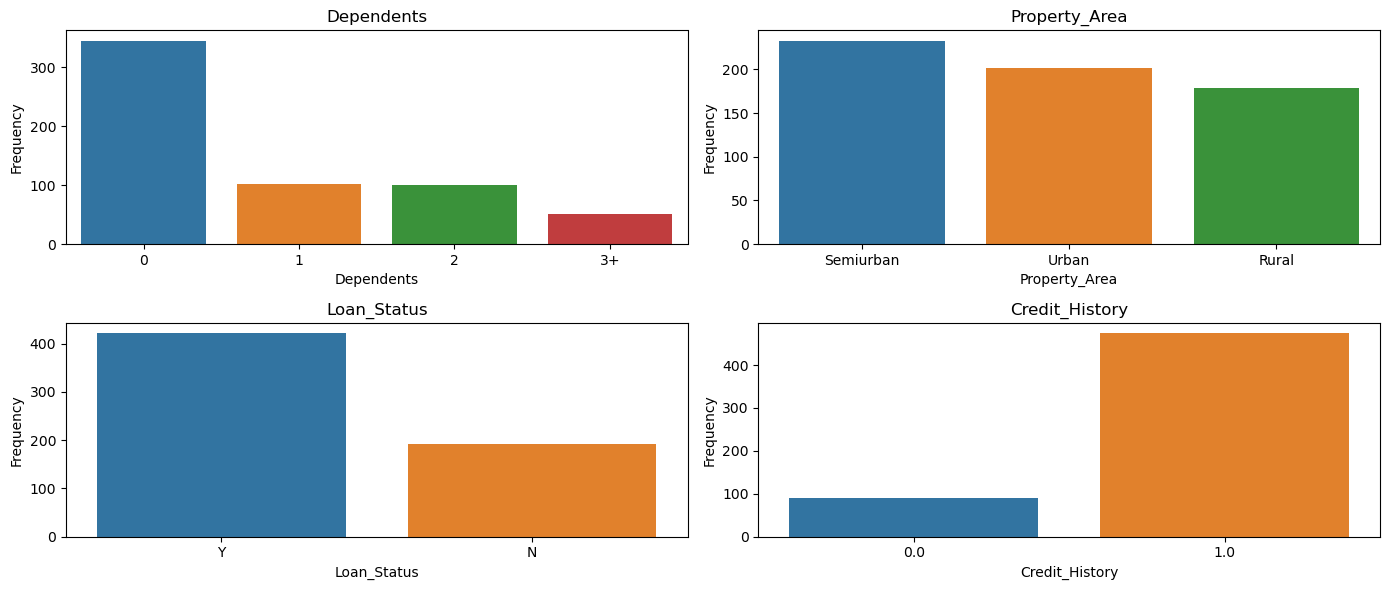

In [12]:
# subplot
plt.figure(figsize=(14,6))
plt.subplot(2,2,1)
sns.barplot(x = df['Dependents'].value_counts().index ,y =df['Dependents'].value_counts())
plt.title('Dependents')
plt.xlabel('Dependents')
plt.ylabel('Frequency')

plt.subplot(2,2,2)
sns.barplot(x = df['Property_Area'].value_counts().index ,y =df['Property_Area'].value_counts())
plt.title('Property_Area')
plt.xlabel('Property_Area')
plt.ylabel('Frequency')

plt.subplot(2,2,3)
sns.barplot(x = df['Loan_Status'].value_counts().index ,y =df['Loan_Status'].value_counts())
plt.title('Loan_Status')
plt.xlabel('Loan_Status')
plt.ylabel('Frequency')

plt.subplot(2,2,4)
sns.barplot(x = df['Credit_History'].value_counts().index ,y =df['Credit_History'].value_counts())
plt.title('Credit_History')
plt.xlabel('Credit_History')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

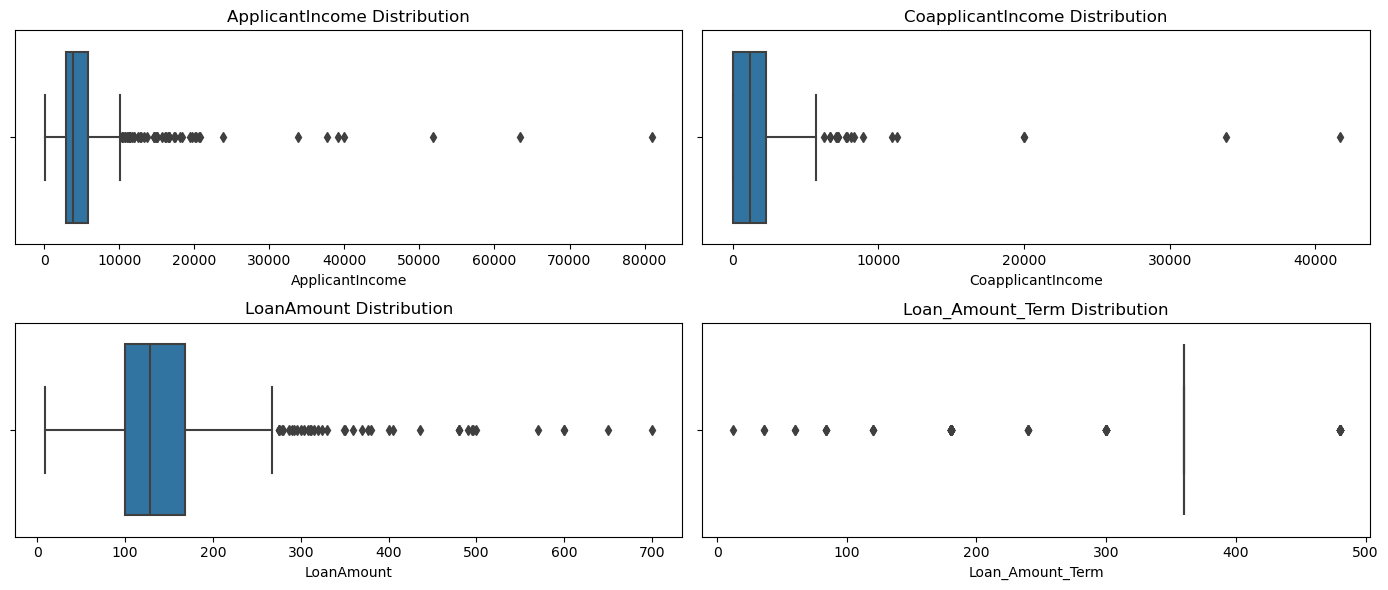

In [13]:
# subplot
plt.figure(figsize=(14,6))
plt.subplot(2,2,1)
sns.boxplot(data = df , x = 'ApplicantIncome')
plt.title('ApplicantIncome Distribution')
plt.xlabel('ApplicantIncome')

plt.subplot(2,2,2)
sns.boxplot(data = df , x = 'CoapplicantIncome')
plt.title('CoapplicantIncome Distribution')
plt.xlabel('CoapplicantIncome')

plt.subplot(2,2,3)
sns.boxplot(data = df , x = 'LoanAmount')
plt.title('LoanAmount Distribution')
plt.xlabel('LoanAmount')

plt.subplot(2,2,4)
sns.boxplot(data = df , x = 'Loan_Amount_Term')
plt.title('Loan_Amount_Term Distribution')
plt.xlabel('Loan_Amount_Term')

plt.tight_layout()
plt.show()

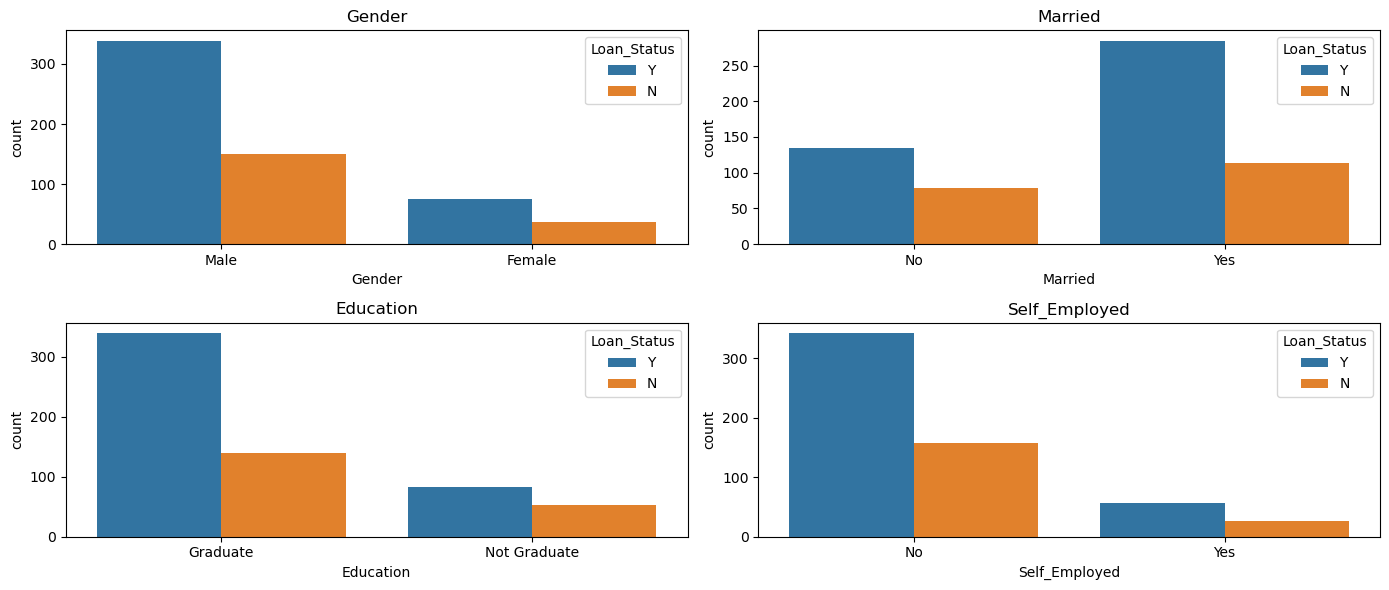

In [14]:
# subplot
plt.figure(figsize=(14,6))
plt.subplot(2,2,1)
sns.countplot(data = df , x = 'Gender' , hue = 'Loan_Status')
plt.title('Gender')
plt.xlabel('Gender')

plt.subplot(2,2,2)
sns.countplot(data = df , x = 'Married' , hue = 'Loan_Status')
plt.title('Married')
plt.xlabel('Married')

plt.subplot(2,2,3)
sns.countplot(data = df , x = 'Education' , hue = 'Loan_Status')
plt.title('Education')
plt.xlabel('Education')

plt.subplot(2,2,4)
sns.countplot(data = df , x = 'Self_Employed' , hue = 'Loan_Status')
plt.title('Self_Employed')
plt.xlabel('Self_Employed')

plt.tight_layout()
plt.show()

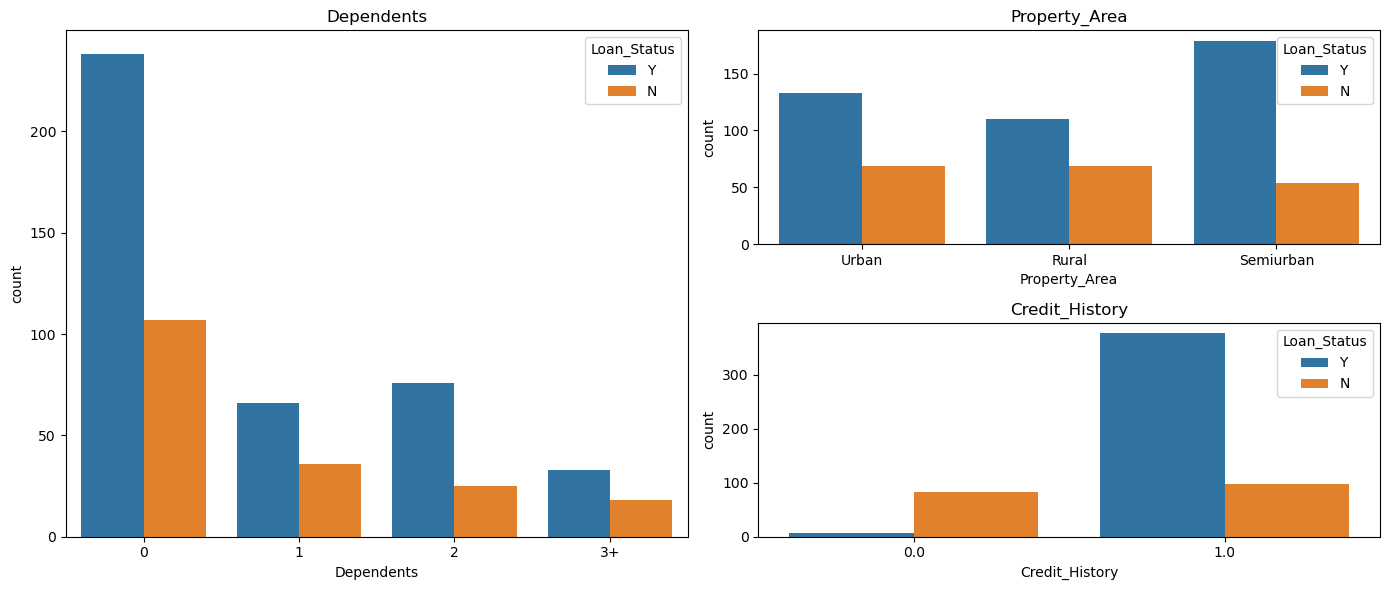

In [15]:
# subplot
plt.figure(figsize=(14,6))
plt.subplot2grid((2, 2), (0, 0), rowspan=2)
sns.countplot(data = df, x = 'Dependents', hue = 'Loan_Status')
plt.title('Dependents')
plt.xlabel('Dependents')

plt.subplot2grid((2, 2), (0, 1))
sns.countplot(data = df, x = 'Property_Area', hue = 'Loan_Status')
plt.title('Property_Area')
plt.xlabel('Property_Area')

plt.subplot2grid((2, 2), (1, 1))
sns.countplot(data = df, x = 'Credit_History', hue = 'Loan_Status')
plt.title('Credit_History')
plt.xlabel('Credit_History')

plt.tight_layout()
plt.show()


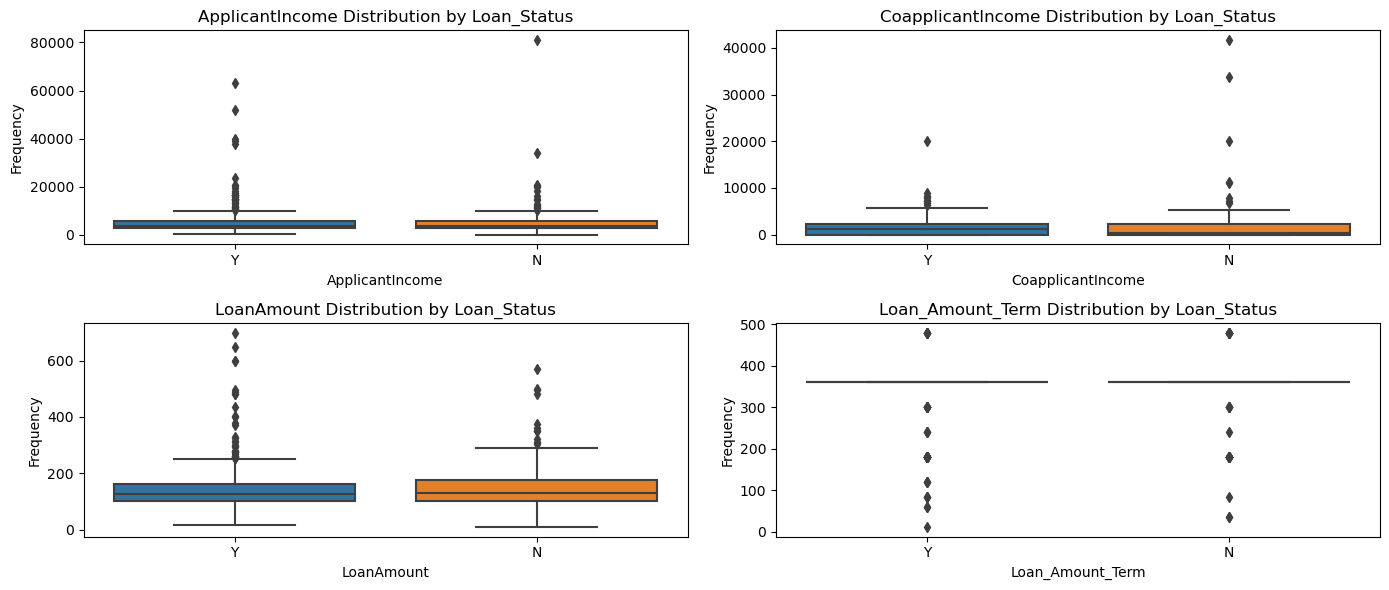

In [16]:
# subplot
plt.figure(figsize=(14,6))
plt.subplot(2,2,1)
sns.boxplot(x = 'Loan_Status' , y = 'ApplicantIncome' , data = df)
plt.title('ApplicantIncome Distribution by Loan_Status')
plt.xlabel('ApplicantIncome')
plt.ylabel('Frequency')

plt.subplot(2,2,2)
sns.boxplot(x = 'Loan_Status' , y = 'CoapplicantIncome' , data = df)
plt.title('CoapplicantIncome Distribution by Loan_Status')
plt.xlabel('CoapplicantIncome')
plt.ylabel('Frequency')

plt.subplot(2,2,3)
sns.boxplot(x = 'Loan_Status' , y = 'LoanAmount' ,data = df)
plt.title('LoanAmount Distribution by Loan_Status')
plt.xlabel('LoanAmount')
plt.ylabel('Frequency')

plt.subplot(2,2,4)
sns.boxplot(x = 'Loan_Status' , y = 'Loan_Amount_Term' , data = df)
plt.title('Loan_Amount_Term Distribution by Loan_Status')
plt.xlabel('Loan_Amount_Term')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<Figure size 1400x600 with 0 Axes>

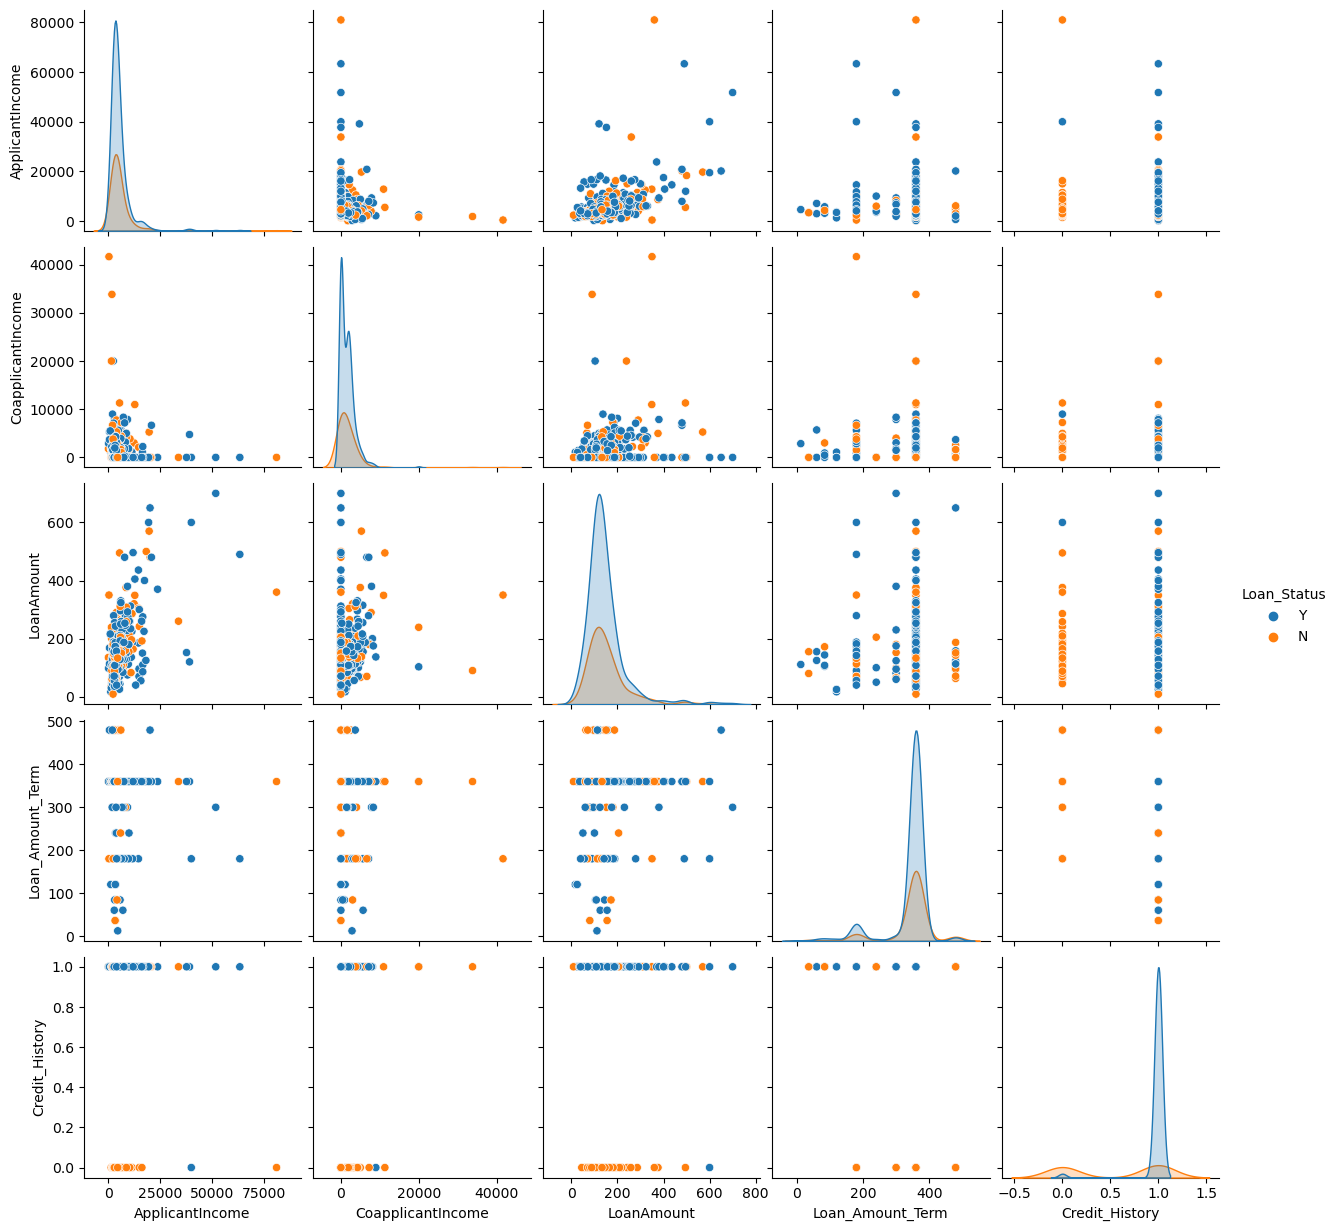

In [17]:
# seaborn
plt.figure(figsize=(14,6))
sns.pairplot(df, hue = 'Loan_Status')
plt.show()

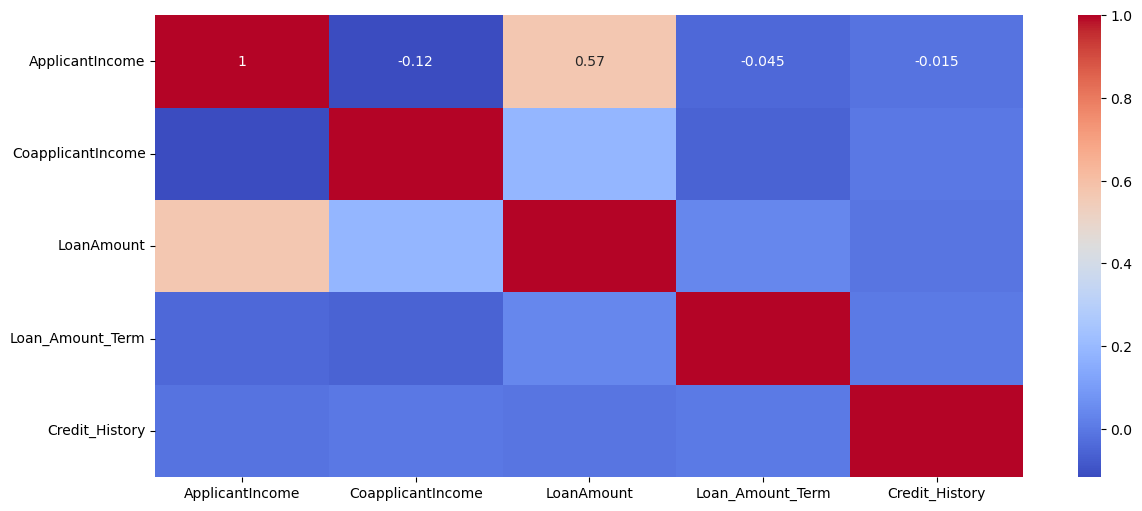

In [18]:
corr = df.loc[:, ['ApplicantIncome' , 'CoapplicantIncome' , 'LoanAmount' , 'Loan_Amount_Term' , 'Credit_History']].corr()
# seaborn
plt.figure(figsize=(14,6))
sns.heatmap(corr , annot= True , cmap = 'coolwarm')
plt.show()

### 3. Split the Dataset
- Split the dataset into training and test sets (70/30).

In [20]:
x = df.drop('Loan_Status' , axis = 1)
y = df['Loan_Status']

In [21]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

### 4. Handle missing values to Train / Test Dataset
- Impute Missing Values by Median -> Numerical Column , Mode -> Categorical Column.

In [23]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 197 to 267
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             420 non-null    object 
 1   Married            427 non-null    object 
 2   Dependents         423 non-null    object 
 3   Education          429 non-null    object 
 4   Self_Employed      406 non-null    object 
 5   ApplicantIncome    429 non-null    int64  
 6   CoapplicantIncome  429 non-null    float64
 7   LoanAmount         413 non-null    float64
 8   Loan_Amount_Term   417 non-null    float64
 9   Credit_History     390 non-null    float64
 10  Property_Area      429 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 40.2+ KB


In [24]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 433 to 147
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             181 non-null    object 
 1   Married            184 non-null    object 
 2   Dependents         176 non-null    object 
 3   Education          185 non-null    object 
 4   Self_Employed      176 non-null    object 
 5   ApplicantIncome    185 non-null    int64  
 6   CoapplicantIncome  185 non-null    float64
 7   LoanAmount         179 non-null    float64
 8   Loan_Amount_Term   183 non-null    float64
 9   Credit_History     174 non-null    float64
 10  Property_Area      185 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 17.3+ KB


In [25]:
# fill Married column by mode value -> Male
gen_mode = x_train['Gender'].mode()[0]

x_train['Gender'].fillna(gen_mode, inplace=True)
x_test['Gender'].fillna(gen_mode, inplace=True)

In [26]:
# fill Married column by mode value -> No
mar_mode = x_train['Married'].mode()[0]

x_train['Married'].fillna(mar_mode, inplace=True)
x_test['Married'].fillna(mar_mode, inplace=True)

In [27]:
# Show unique values in Self_Employed column
x_train['Dependents'].value_counts(normalize=True)

0     0.572104
1     0.179669
2     0.163121
3+    0.085106
Name: Dependents, dtype: float64

In [28]:
# Show unique values in Self_Employed column
x_test['Dependents'].value_counts(normalize=True)

0     0.585227
2     0.181818
1     0.147727
3+    0.085227
Name: Dependents, dtype: float64

In [29]:
# fill Dependents column by mode value -> 0
dep_mode = x_train['Dependents'].mode()[0]

x_train['Dependents'].fillna(dep_mode, inplace=True)
x_test['Dependents'].fillna(dep_mode, inplace=True)

In [30]:
# Show unique values in Self_Employed column
x_train['Self_Employed'].value_counts(normalize=True)

No     0.857143
Yes    0.142857
Name: Self_Employed, dtype: float64

In [31]:
# Show unique values in Self_Employed column
x_test['Self_Employed'].value_counts(normalize=True)

No     0.863636
Yes    0.136364
Name: Self_Employed, dtype: float64

In [32]:
# Calculate mode from train only
self_emp_mode = x_train['Self_Employed'].mode()[0]

# Use it to fill null values in train
x_train['Self_Employed'].fillna(self_emp_mode, inplace=True)

# Use it to fill null values in test
x_test['Self_Employed'].fillna(self_emp_mode, inplace=True)


In [33]:
# Check the numbered columns
x_train['ApplicantIncome']   = pd.to_numeric(x_train['ApplicantIncome'], errors='coerce')
x_train['CoapplicantIncome'] = pd.to_numeric(x_train['CoapplicantIncome'], errors='coerce')
x_train['LoanAmount']        = pd.to_numeric(x_train['LoanAmount'], errors='coerce')

x_test['ApplicantIncome']   = pd.to_numeric(x_test['ApplicantIncome'], errors='coerce')
x_test['CoapplicantIncome'] = pd.to_numeric(x_test['CoapplicantIncome'], errors='coerce')
x_test['LoanAmount']        = pd.to_numeric(x_test['LoanAmount'], errors='coerce')

# Create TotalIncome
x_train['TotalIncome'] = x_train['ApplicantIncome'] + x_train['CoapplicantIncome']
x_test['TotalIncome']  = x_test['ApplicantIncome']  + x_test['CoapplicantIncome']

# Create valid bins from the same column
x_train_nonnull = x_train[x_train['TotalIncome'].notnull()]
_, bins = pd.qcut(
    x_train_nonnull['TotalIncome'], 
    q=3, 
    labels=False, 
    retbins=True, 
    duplicates='drop'
)

labels = ['low', 'medium', 'high'][:len(bins)-1]

# Applying classifications based on the same boundaries
x_train['TotalIncome_cat'] = pd.cut(
    x_train['TotalIncome'], bins=bins, labels=labels, include_lowest=True
)
x_test['TotalIncome_cat'] = pd.cut(
    x_test['TotalIncome'], bins=bins, labels=labels, include_lowest=True
)

# LoanAmount compensation by category
loanamount_medians = (
    x_train.groupby('TotalIncome_cat', observed=True)['LoanAmount']
    .median()
    .fillna(x_train['LoanAmount'].median())
)

# Fill train
filled = x_train.groupby('TotalIncome_cat', observed=True)['LoanAmount'].transform(
    lambda s: s.fillna(s.median())
)
x_train.loc[:, 'LoanAmount'] = filled.astype(float)   

pd.options.mode.copy_on_write = False  # Close CoW to prevent LossySetitemError

# Fill test
mask = x_test['LoanAmount'].isna()
x_test = x_test.assign(
    LoanAmount = np.where(
        x_test['LoanAmount'].isna(),
        x_test['TotalIncome_cat'].map(loanamount_medians),
        x_test['LoanAmount']
    )
)
x_test['LoanAmount'].fillna(x_train['LoanAmount'].median(), inplace=True)
x_test['LoanAmount'] = x_test['LoanAmount'].astype(float)

In [34]:
x_train['Loan_Amount_Term'].value_counts()  # Show unique values in Loan_Amount_Term column

360.0    355
180.0     32
300.0     10
480.0      8
240.0      4
60.0       2
84.0       2
120.0      2
36.0       1
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [35]:
x_test['Loan_Amount_Term'].value_counts()  # Show unique values in Loan_Amount_Term column

360.0    157
180.0     12
480.0      7
300.0      3
84.0       2
36.0       1
120.0      1
Name: Loan_Amount_Term, dtype: int64

In [36]:
# Fill NaN values by mode
loan_term_mode = x_train['Loan_Amount_Term'].mode()[0]

x_train['Loan_Amount_Term'].fillna(loan_term_mode, inplace=True)
x_test['Loan_Amount_Term'].fillna(loan_term_mode, inplace=True)

In [37]:
# fill Credit_History column by value -> -1
x_train["Credit_History"].fillna(-1, inplace=True)
x_test["Credit_History"].fillna(-1, inplace=True)

In [38]:
x_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
TotalIncome          0
TotalIncome_cat      0
dtype: int64

In [39]:
x_test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
TotalIncome          0
TotalIncome_cat      0
dtype: int64

### 5. Encoding to Train / Test Dataset
- Handle Inconsistent Values.
- Encode categorical features.

In [41]:
# Handle Gender , Married , Education , Self_Employed columns by One Hot Encoding
x_train = pd.get_dummies(x_train , columns = ['Gender' , 'Married' , 'Education' , 'Self_Employed' ] , drop_first = True)
x_test = pd.get_dummies(x_test , columns = ['Gender' , 'Married' , 'Education' , 'Self_Employed'] , drop_first = True)

In [42]:
# Handle Loan_Status columns by One Hot Encoding
y_train = pd.get_dummies(y_train , drop_first = True)
y_test = pd.get_dummies(y_test , drop_first = True)

In [43]:
# Delete '+' from values and Convert DataType to Integer
x_train['Dependents'] = x_train['Dependents'].str.strip('+')
x_test['Dependents'] = x_test['Dependents'].str.strip('+')
x_train['Dependents'] = x_train['Dependents'].astype(int)
x_test['Dependents'] = x_test['Dependents'].astype(int)

In [44]:
# Handle Property_Area column by Label Encoding
label = LabelEncoder()
x_train['Property_Area'] = label.fit_transform(x_train['Property_Area'])
x_test['Property_Area'] = label.transform(x_test['Property_Area'])

In [45]:
# Drop TotalIncome_cat column from the data 
x_train = x_train.drop('TotalIncome_cat' , axis = 1)
x_test = x_test.drop('TotalIncome_cat' , axis = 1)

In [46]:
x_train.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes
count,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000
mean,0.750583,5623.212121,1588.776224,148.678322,340.923077,0.689977,1.025641,7211.988345,0.832168,0.662005,0.216783,0.135198
std,1.007347,6763.466739,2787.711907,88.671103,64.182612,0.629803,0.795310,6985.856383,0.374154,0.473579,0.412535,0.342334
min,0.000000,210.000000,0.000000,9.000000,12.000000,-1.000000,0.000000,1442.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2917.000000,0.000000,100.000000,360.000000,1.000000,0.000000,4230.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,3902.000000,1086.000000,129.000000,360.000000,1.000000,1.000000,5454.000000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,5821.000000,2250.000000,172.000000,360.000000,1.000000,2.000000,7583.000000,1.000000,1.000000,0.000000,0.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,81000.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
x_test.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes
count,185.000000,185.00000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,0.729730,4893.87027,1696.540108,140.118919,345.859459,0.697297,1.064865,6590.410378,0.783784,0.632432,0.221622,0.129730
std,1.017474,4189.79271,3231.504375,73.099448,65.039133,0.576009,0.770452,5018.234342,0.412781,0.483451,0.416465,0.336918
min,0.000000,150.00000,0.000000,25.000000,36.000000,-1.000000,0.000000,1830.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2698.00000,0.000000,100.000000,360.000000,1.000000,0.000000,3900.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,3617.00000,1411.000000,123.000000,360.000000,1.000000,1.000000,5297.000000,1.000000,1.000000,0.000000,0.000000
75%,2.000000,5667.00000,2383.000000,162.000000,360.000000,1.000000,2.000000,6873.000000,1.000000,1.000000,0.000000,0.000000
max,3.000000,39147.00000,33837.000000,500.000000,480.000000,1.000000,2.000000,43897.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
# Make sure that test has the same columns as train
x_test = x_test.reindex(columns = x_train.columns, fill_value = False)

In [49]:
x_train.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes
197,0,1907,2365.0,120.0,360.0,1.0,2,4272.0,0,0,1,0
175,0,3497,1964.0,116.0,360.0,1.0,0,5461.0,1,1,0,0
526,0,3775,0.0,110.0,360.0,1.0,1,3775.0,1,1,0,0
149,0,4860,830.0,125.0,360.0,1.0,1,5690.0,1,1,0,0
507,0,3583,0.0,96.0,360.0,1.0,2,3583.0,1,0,0,0


In [50]:
x_test.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes
433,0,2425,2340.0,143.0,360.0,1.0,1,4765.0,1,1,0,0
415,0,2995,0.0,60.0,360.0,1.0,2,2995.0,0,0,0,0
144,2,11757,0.0,187.0,180.0,1.0,2,11757.0,1,1,0,0
522,3,5677,1424.0,100.0,360.0,1.0,0,7101.0,1,1,0,1
493,0,17263,0.0,225.0,360.0,1.0,1,17263.0,0,0,1,1


### 6. Handle Outlier Handling to Train / Test Dataset
- Apply IQR.
- Aplly Winsorizing (Replace the extreme values with a certain percentile value).

In [52]:
cols_with_outliers = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

for col in cols_with_outliers:
    Q1 = x_train[col].quantile(0.25)
    Q3 = x_train[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    print(f"column : {col} -> lower bound : {lower} - upper bound : {upper}\n")
    
    x_train[col] = np.where(x_train[col] > upper, upper,
                         np.where(x_train[col] < lower, lower, x_train[col]))

    x_test[col] = np.where(x_test[col] > upper, upper,
                        np.where(x_test[col] < lower, lower, x_test[col]))

column : ApplicantIncome -> lower bound : -1439.0 - upper bound : 10177.0

column : CoapplicantIncome -> lower bound : -3375.0 - upper bound : 5625.0

column : LoanAmount -> lower bound : -8.0 - upper bound : 280.0



### 7. Handle Imbalanced Class to Train Dataset
- Apply SMOTE.

In [54]:
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [55]:
y_train.value_counts()

Y
1    295
0    134
dtype: int64

In [56]:
y_test.value_counts()

Y
1    127
0     58
dtype: int64

In [57]:
y_train_resampled.value_counts()

Y
0    295
1    295
dtype: int64

### 8. Scalling to Train / Test Dataset
- Apply feature scaling.

In [59]:
scaler = RobustScaler()

x_train_resampled = scaler.fit_transform(x_train_resampled)
x_test = scaler.transform(x_test)

### 9. Model Training (without Parameter)
- Train Logistic Regression without Parameter.

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression (without parameter) Results:
Accuracy: 0.6324
Precision: 0.7565
Recall: 0.6850
F1 Score: 0.7190
----------------------------------------


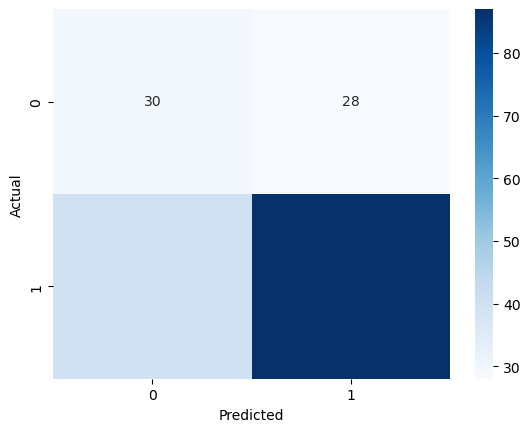

Classification Report Logistic Regression (without parameter):
              precision    recall  f1-score   support

           0       0.43      0.52      0.47        58
           1       0.76      0.69      0.72       127

    accuracy                           0.63       185
   macro avg       0.59      0.60      0.59       185
weighted avg       0.65      0.63      0.64       185



In [61]:
# Logistic Regression without parameter
log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train_resampled, y_train_resampled)
y_pred = log_reg.predict(x_test)

# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{model_name} Results:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {pre:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 40)

# Evaluate model
evaluate_model(y_test, y_pred, "Logistic Regression (without parameter)")

# print the confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report Logistic Regression (without parameter):")
print(classification_report(y_test, y_pred))

In [62]:
EXP_NAME = "Loan_Models_Experiment"  
mlflow.set_experiment(EXP_NAME)

2025/11/08 21:29:50 INFO mlflow.tracking.fluent: Experiment with name 'Loan_Models_Experiment' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///C:/Users/DELL/Downloads/mlruns/761491556606893555', creation_time=1762630190268, experiment_id='761491556606893555', last_update_time=1762630190268, lifecycle_stage='active', name='Loan_Models_Experiment', tags={}>

In [63]:
# ----- MLflow Run for default Logistic Regression -----
with mlflow.start_run(run_name="Logistic_Regression_Default"):

    y_pred_default = log_reg.predict(x_test)

    acc = accuracy_score(y_test, y_pred_default)
    prec = precision_score(y_test, y_pred_default)
    rec = recall_score(y_test, y_pred_default)
    f1 = f1_score(y_test, y_pred_default)

    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)

    mlflow.log_param("penalty", log_reg.penalty)
    mlflow.log_param("C", log_reg.C)
    mlflow.log_param("solver", log_reg.solver)
    mlflow.log_param("max_iter" , log_reg.max_iter)

    mlflow.sklearn.log_model(log_reg, "Logistic Regression (without parameter)")

print("MLflow logging for Logistic Regression default model done.")


2025/11/08 21:29:51 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/08 21:30:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow logging for Logistic Regression default model done.


### 10. Model Training (L1 penalty (Lasso))(without GridSearchCV)
- Train Logistic Regression with L1 penalty (Lasso).

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression with L1 (without GridSearchCV) Results:
Accuracy: 0.6378
Precision: 0.7632
Recall: 0.6850
F1 Score: 0.7220
----------------------------------------


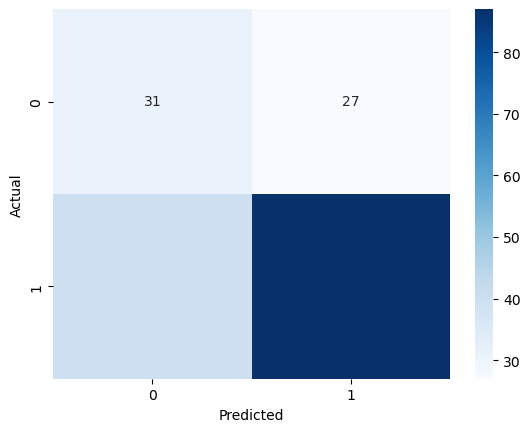

Classification Report Logistic Regression with L1 (without GridSearchCV):
              precision    recall  f1-score   support

           0       0.44      0.53      0.48        58
           1       0.76      0.69      0.72       127

    accuracy                           0.64       185
   macro avg       0.60      0.61      0.60       185
weighted avg       0.66      0.64      0.65       185



In [65]:
# Logistic Regression with L1 penalty (Lasso)
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
log_reg_l1.fit(x_train_resampled, y_train_resampled)
y_pred_l1 = log_reg_l1.predict(x_test)

# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{model_name} Results:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {pre:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 40)

# Evaluate model
evaluate_model(y_test, y_pred_l1, "Logistic Regression with L1 (without GridSearchCV)")

# print the confusion_matrix
cm = confusion_matrix(y_test, y_pred_l1)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report Logistic Regression with L1 (without GridSearchCV):")
print(classification_report(y_test, y_pred_l1))

In [66]:
# ----- MLflow Run for Logistic Regression with L1 (without GridSearchCV) -----
with mlflow.start_run(run_name="Logistic_Regression_with_L1_(without GridSearchCV)"):

    y_pred_default = log_reg_l1.predict(x_test)

    acc = accuracy_score(y_test, y_pred_default)
    prec = precision_score(y_test, y_pred_default)
    rec = recall_score(y_test, y_pred_default)
    f1 = f1_score(y_test, y_pred_default)

    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)

    mlflow.log_param("penalty", log_reg_l1.penalty)
    mlflow.log_param("C", log_reg_l1.C)
    mlflow.log_param("solver", log_reg_l1.solver)
    mlflow.log_param("max_iter" , log_reg_l1.max_iter)

    mlflow.sklearn.log_model(log_reg_l1, "Logistic Regression with L1 (without GridSearchCV)")

print("MLflow logging for Logistic Regression with L1 (without GridSearchCV) model done.")


2025/11/08 21:30:12 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/08 21:30:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow logging for Logistic Regression with L1 (without GridSearchCV) model done.


### 11. Model Training (L2 penalty (Ridge))(without GridSearchCV)
- Train Logistic Regression with L2 penalty (Ridge).

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression with L2 (without GridSearchCV) Results:
Accuracy: 0.6270
Precision: 0.7544
Recall: 0.6772
F1 Score: 0.7137
----------------------------------------


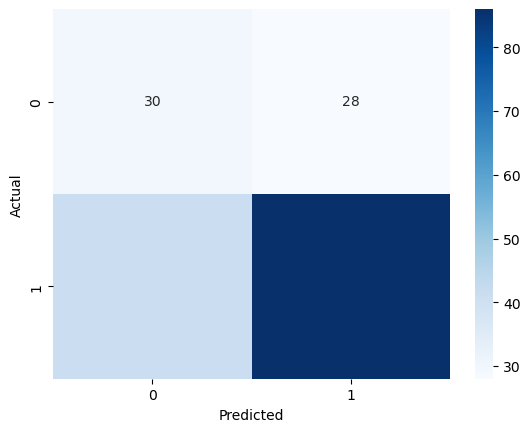

Classification Report Logistic Regression with L2 (without GridSearchCV):
              precision    recall  f1-score   support

           0       0.42      0.52      0.47        58
           1       0.75      0.68      0.71       127

    accuracy                           0.63       185
   macro avg       0.59      0.60      0.59       185
weighted avg       0.65      0.63      0.64       185



In [68]:
# Logistic Regression with L2 penalty (Ridge)
log_reg_l2 = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
log_reg_l2.fit(x_train_resampled, y_train_resampled)
y_pred_l2 = log_reg_l2.predict(x_test)

# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{model_name} Results:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {pre:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 40)

# Evaluate model
evaluate_model(y_test, y_pred_l2, "Logistic Regression with L2 (without GridSearchCV)")

# print the confusion_matrix
cm = confusion_matrix(y_test, y_pred_l2)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report Logistic Regression with L2 (without GridSearchCV):")
print(classification_report(y_test, y_pred_l2))

In [69]:
# ----- MLflow Run for Logistic Regression with L2 (without GridSearchCV) -----
with mlflow.start_run(run_name="Logistic_Regression_with_L2_(without GridSearchCV)"):

    y_pred_default = log_reg_l2.predict(x_test)

    acc = accuracy_score(y_test, y_pred_default)
    prec = precision_score(y_test, y_pred_default)
    rec = recall_score(y_test, y_pred_default)
    f1 = f1_score(y_test, y_pred_default)

    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)

    mlflow.log_param("penalty", log_reg_l2.penalty)
    mlflow.log_param("C", log_reg_l2.C)
    mlflow.log_param("solver", log_reg_l2.solver)
    mlflow.log_param("max_iter" , log_reg_l2.max_iter)

    mlflow.sklearn.log_model(log_reg_l2, "Logistic Regression with L2 (without GridSearchCV)")

print("MLflow logging for Logistic Regression with L2 (without GridSearchCV) model done.")


2025/11/08 21:30:24 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/08 21:30:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow logging for Logistic Regression with L2 (without GridSearchCV) model done.


### 12. Model Training (L1 penalty (Lasso))(with GridSearchCV)
- Train Logistic Regression with GridSearchCV (L1 penalty (Lasso)).

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best Parameters: {'C': 1.5, 'l1_ratio': 0, 'max_iter': 10, 'solver': 'liblinear'}
Best F1: 0.6762685778908443

Test Set Evaluation:
Accuracy: 0.6270
Precision: 0.7500
Recall: 0.6850
F1 Score: 0.7160


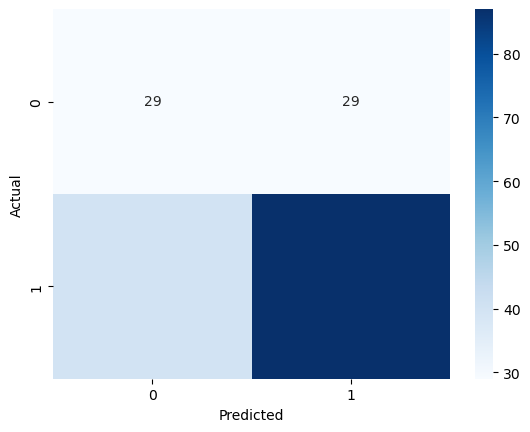

Classification Report Logistic Regression (L1 penalty (Lasso))(with GridSearchCV):
              precision    recall  f1-score   support

           0       0.42      0.50      0.46        58
           1       0.75      0.69      0.72       127

    accuracy                           0.63       185
   macro avg       0.59      0.59      0.59       185
weighted avg       0.65      0.63      0.63       185



In [71]:
# Logistic Regression
log_reg = LogisticRegression(penalty='l1', random_state=42)

# Definition of hyperparameters grid
param_grid = {
    'max_iter' : np.arange(10 , 110 , 10) ,
    'C': np.arange(0.5 , 5 , 0.5),
    'solver': ['liblinear', 'saga'],
    'l1_ratio': [0, 0.5, 1]  
}

# We use StratifiedKFold to ensure balance in classes within each split.
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=cv_strategy,
    scoring='f1',        
    n_jobs=-1,
    verbose=2
)

# Train GridSearchCV on balanced training data (after SMOTE)
grid_search.fit(x_train_resampled, y_train_resampled)

# Show the best results
print("Best Parameters:", grid_search.best_params_)
print("Best F1:", grid_search.best_score_)

# Use the best model
best_log_reg = grid_search.best_estimator_

# Prediction on test data
y_pred_best = best_log_reg.predict(x_test)


print("\nTest Set Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_best):.4f}")

# print the confusion_matrix
cm = confusion_matrix(y_test, y_pred_best)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report Logistic Regression (L1 penalty (Lasso))(with GridSearchCV):")
print(classification_report(y_test, y_pred_best))

In [72]:
# ----- MLflow Run for Decision Tree GridSearch -----
with mlflow.start_run(run_name="Logistic_Regression_(L1_penalty_(Lasso))_GridSearch"):

    best_model = grid_search.best_estimator_

    mlflow.log_params(grid_search.best_params_)

    y_pred_grid = best_model.predict(x_test)

    acc = accuracy_score(y_test, y_pred_grid)
    prec = precision_score(y_test, y_pred_grid)
    rec = recall_score(y_test, y_pred_grid)
    f1 = f1_score(y_test, y_pred_grid)

    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)
    
    mlflow.sklearn.log_model(best_model, "Logistic Regression (L1 penalty (Lasso))(with GridSearchCV)")

print("MLflow logging for Logistic Regression (L1 penalty (Lasso))(with GridSearchCV)e done.")


2025/11/08 21:31:05 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/08 21:31:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow logging for Logistic Regression (L1 penalty (Lasso))(with GridSearchCV)e done.


### 13. Model Training (L2 penalty (Ridge))(with GridSearchCV)
- Train Logistic Regression with GridSearchCV (L2 penalty (Ridge)).

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Parameters: {'C': 0.2, 'l1_ratio': 0, 'max_iter': 10, 'solver': 'liblinear'}
Best F1: 0.6746978885396839

Test Set Evaluation:
Accuracy: 0.6324
Precision: 0.7706
Recall: 0.6614
F1 Score: 0.7119


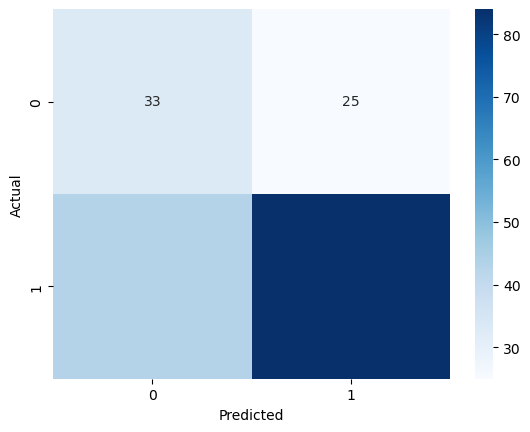

Classification Report Logistic Regression (L2 penalty (Ridge))(with GridSearchCV):
              precision    recall  f1-score   support

           0       0.43      0.57      0.49        58
           1       0.77      0.66      0.71       127

    accuracy                           0.63       185
   macro avg       0.60      0.62      0.60       185
weighted avg       0.67      0.63      0.64       185



In [74]:
# Logistic Regression
log_reg = LogisticRegression(penalty='l2', random_state=42)

# Definition of hyperparameters grid
param_grid = {
    'max_iter' : np.arange(10 , 110 , 10),
    'C': np.arange(0.1 , 1 , 0.1),
    'solver': ['liblinear', 'saga'],
    'l1_ratio': [0, 0.5, 1]  
}

# We use StratifiedKFold to ensure balance in classes within each split.
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=cv_strategy,
    scoring='f1',        
    n_jobs=-1,
    verbose=2
)

# Train GridSearchCV on balanced training data (after SMOTE)
grid_search.fit(x_train_resampled, y_train_resampled)

# Show the best results
print("Best Parameters:", grid_search.best_params_)
print("Best F1:", grid_search.best_score_)

# Use the best model
best_log_reg = grid_search.best_estimator_

# Prediction on test data
y_pred_best = best_log_reg.predict(x_test)


print("\nTest Set Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_best):.4f}")

# print the confusion_matrix
cm = confusion_matrix(y_test, y_pred_best)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report Logistic Regression (L2 penalty (Ridge))(with GridSearchCV):")
print(classification_report(y_test, y_pred_best))

In [75]:
# ----- MLflow Run for Decision Tree GridSearch -----
with mlflow.start_run(run_name="Logistic_Regression_(L2_penalty_(Ridge))_GridSearch"):

    best_model = grid_search.best_estimator_

    mlflow.log_params(grid_search.best_params_)

    y_pred_grid = best_model.predict(x_test)

    acc = accuracy_score(y_test, y_pred_grid)
    prec = precision_score(y_test, y_pred_grid)
    rec = recall_score(y_test, y_pred_grid)
    f1 = f1_score(y_test, y_pred_grid)

    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)
    
    mlflow.sklearn.log_model(best_model, "Logistic Regression (L2 penalty (Ridge))(with GridSearchCV)")

print("MLflow logging for Logistic Regression (L2 penalty (Ridge))(with GridSearchCV)e done.")


2025/11/08 21:31:34 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/08 21:31:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow logging for Logistic Regression (L2 penalty (Ridge))(with GridSearchCV)e done.


### 14. Model Training (without Parameter)
- Train Decision Tree without Parameter.

Decision Tree (without parameter) Results:
Accuracy: 0.7135
Precision: 0.8426
Recall: 0.7165
F1 Score: 0.7745
----------------------------------------


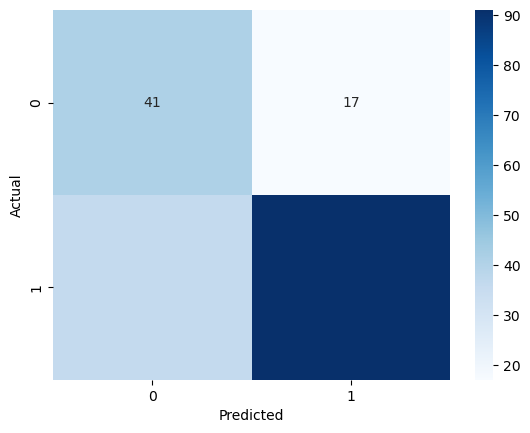

Classification Report Decision Tree (without parameter):
              precision    recall  f1-score   support

           0       0.53      0.71      0.61        58
           1       0.84      0.72      0.77       127

    accuracy                           0.71       185
   macro avg       0.69      0.71      0.69       185
weighted avg       0.75      0.71      0.72       185



In [77]:
# Logistic Regression without parameter
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(x_train_resampled, y_train_resampled)
y_pred = dec_tree.predict(x_test)

# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{model_name} Results:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {pre:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 40)

# Evaluate model
evaluate_model(y_test, y_pred, "Decision Tree (without parameter)")

# print the confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report Decision Tree (without parameter):")
print(classification_report(y_test, y_pred))

In [78]:
# ----- MLflow Run for default Decision Tree -----
with mlflow.start_run(run_name="Decision_Tree_Default"):

    y_pred_default = dec_tree.predict(x_test)

    acc = accuracy_score(y_test, y_pred_default)
    prec = precision_score(y_test, y_pred_default)
    rec = recall_score(y_test, y_pred_default)
    f1 = f1_score(y_test, y_pred_default)

    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)

    mlflow.log_param("max_depth", dec_tree.max_depth)
    mlflow.log_param("min_samples_split", dec_tree.min_samples_split)
    mlflow.log_param("min_samples_leaf", dec_tree.min_samples_leaf)
    mlflow.log_param("max_features", dec_tree.max_features)
    mlflow.log_param("criterion", dec_tree.criterion)

    mlflow.sklearn.log_model(dec_tree, "Decision Tree (without parameter)")

print("MLflow logging for Decision Tree default model done.")


2025/11/08 21:31:46 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/08 21:31:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow logging for Decision Tree default model done.


### 15. Model Training (with Parameter)
- Train Decision Tree with Parameter.

Decision Tree (with parameter) Results:
Accuracy: 0.7946
Precision: 0.8201
Recall: 0.8976
F1 Score: 0.8571
----------------------------------------


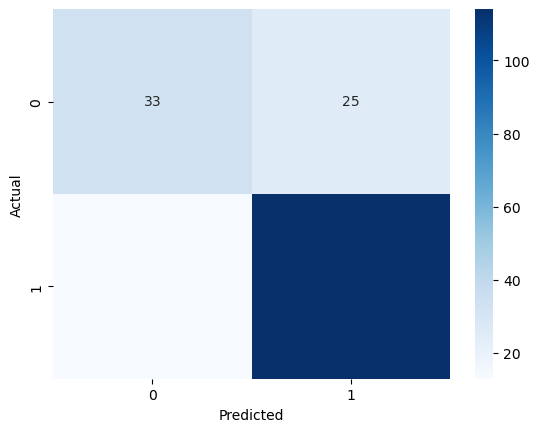

Classification Report Decision Tree (with parameter):
              precision    recall  f1-score   support

           0       0.72      0.57      0.63        58
           1       0.82      0.90      0.86       127

    accuracy                           0.79       185
   macro avg       0.77      0.73      0.75       185
weighted avg       0.79      0.79      0.79       185



In [80]:
# Decision Tree with parameter
dec_tree = DecisionTreeClassifier(
    max_depth = 5 ,
    min_samples_split = 2 ,
    min_samples_leaf = 3 ,
    max_features = 'sqrt' ,
    criterion = 'gini',
    random_state=42)
dec_tree.fit(x_train_resampled, y_train_resampled)
y_pred = dec_tree.predict(x_test)

# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{model_name} Results:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {pre:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 40)

# Evaluate model
evaluate_model(y_test, y_pred, "Decision Tree (with parameter)")

# print the confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report Decision Tree (with parameter):")
print(classification_report(y_test, y_pred))

In [81]:
# ----- MLflow Run for Decision Tree with parameter-----
with mlflow.start_run(run_name="Decision_Tree_with_parameter"):

    y_pred_default = dec_tree.predict(x_test)

    acc = accuracy_score(y_test, y_pred_default)
    prec = precision_score(y_test, y_pred_default)
    rec = recall_score(y_test, y_pred_default)
    f1 = f1_score(y_test, y_pred_default)

    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)

    mlflow.log_param("max_depth", dec_tree.max_depth)
    mlflow.log_param("min_samples_split", dec_tree.min_samples_split)
    mlflow.log_param("min_samples_leaf", dec_tree.min_samples_leaf)
    mlflow.log_param("max_features", dec_tree.max_features)
    mlflow.log_param("criterion", dec_tree.criterion)

    mlflow.sklearn.log_model(dec_tree, "Decision Tree (with parameter)")

print("MLflow logging for Decision Tree with parameter model done.")


2025/11/08 21:31:59 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/08 21:32:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow logging for Decision Tree with parameter model done.


### 16. Model Training (with GridSearchCV)
- Train Decision Tree  with GridSearchCV.

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
720 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py", line 471, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\DELL\anaconda3\Lib\site-packages\s

Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best F1: 0.7876205500705016

Test Set Evaluation:
Accuracy: 0.8378
Precision: 0.8299
Recall: 0.9606
F1 Score: 0.8905


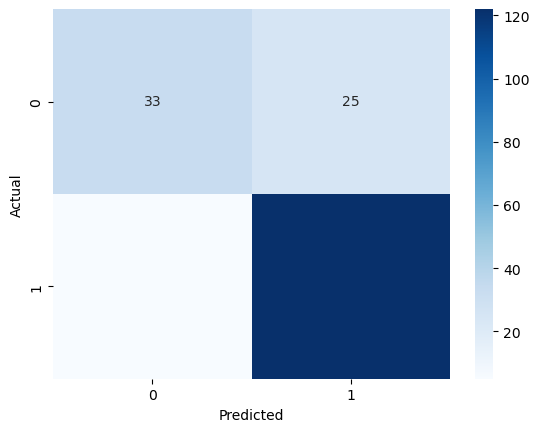

Classification Report Decision Tree (with GridSearchCV):
              precision    recall  f1-score   support

           0       0.87      0.57      0.69        58
           1       0.83      0.96      0.89       127

    accuracy                           0.84       185
   macro avg       0.85      0.76      0.79       185
weighted avg       0.84      0.84      0.83       185



In [83]:
# Decision Tree
dec_tree = DecisionTreeClassifier(random_state=42)

# Definition of hyperparameters grid
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],   # How to calculate the quality of the split
    'max_depth': np.arange(1 , 5 , 1),                # Maximum tree depth
    'min_samples_split': np.arange(1 , 5 , 1),                # Minimum number of samples to split a node
    'min_samples_leaf': np.arange(1 , 5 , 1),                  # Minimum number of samples in the paper
    'max_features': [None, 'sqrt', 'log2']          # Number of features selected at each split
}

# We use StratifiedKFold to ensure balance in classes within each split.
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(
    estimator = dec_tree,
    param_grid = param_grid,
    cv = cv_strategy,                   # Number of folds in cross-validation
    scoring = 'f1',     
    n_jobs = -1,              
    verbose = 2
)

# Train GridSearchCV on balanced training data (after SMOTE)
grid_search.fit(x_train_resampled, y_train_resampled)

# Show the best results
print("Best Parameters:", grid_search.best_params_)
print("Best F1:", grid_search.best_score_)

# Use the best model
best_dec_tree = grid_search.best_estimator_

# Prediction on test data
y_pred_best = best_dec_tree.predict(x_test)


print("\nTest Set Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_best):.4f}")

# print the confusion_matrix
cm = confusion_matrix(y_test, y_pred_best)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report Decision Tree (with GridSearchCV):")
print(classification_report(y_test, y_pred_best))

In [84]:
# ----- MLflow Run for Decision Tree GridSearch -----
with mlflow.start_run(run_name="Decision_Tree_GridSearch"):

    best_model = grid_search.best_estimator_

    mlflow.log_params(grid_search.best_params_)

    y_pred_grid = best_model.predict(x_test)

    acc = accuracy_score(y_test, y_pred_grid)
    prec = precision_score(y_test, y_pred_grid)
    rec = recall_score(y_test, y_pred_grid)
    f1 = f1_score(y_test, y_pred_grid)

    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)
    
    mlflow.sklearn.log_model(best_model, "Decision Tree (with GridSearchCV)")

print("MLflow logging for GridSearch Decision Tree done.")


2025/11/08 21:32:22 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/08 21:32:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow logging for GridSearch Decision Tree done.
